In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/daily_price.csv')
data.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,3200.0,3400.0,3200.0
1,Andhra Pradesh,Chittor,Chittoor,Mango,Neelam,Medium,700.0,1500.0,1200.0
2,Andhra Pradesh,Chittor,Chittoor,Mango,Totapuri,Medium,1400.0,1800.0,1600.0
3,Andhra Pradesh,Cuddapah,Cuddapah,Groundnut,Local,FAQ,4059.0,7589.0,7559.0
4,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Bulb,FAQ,4778.0,6160.0,5845.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        5557 non-null   object 
 1   District     5557 non-null   object 
 2   Market       5557 non-null   object 
 3   Commodity    5557 non-null   object 
 4   Variety      5557 non-null   object 
 5   Grade        5557 non-null   object 
 6   Min Price    5557 non-null   float64
 7   Max Price    5557 non-null   float64
 8   Modal Price  5557 non-null   float64
dtypes: float64(3), object(6)
memory usage: 390.9+ KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Min Price,5557.0,4109.732091,4667.234302,0.00,1700.0,2660.0,5300.0,95000.0
Max Price,5557.0,4694.127320,5236.560123,0.00,2000.0,3100.0,5950.0,115000.0
Modal Price,5557.0,4417.495256,4962.823629,0.72,1900.0,3000.0,5550.0,110000.0


In [ ]:
data.isna().sum()


,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Min Price,0
Max Price,0
Modal Price,0


Visualization

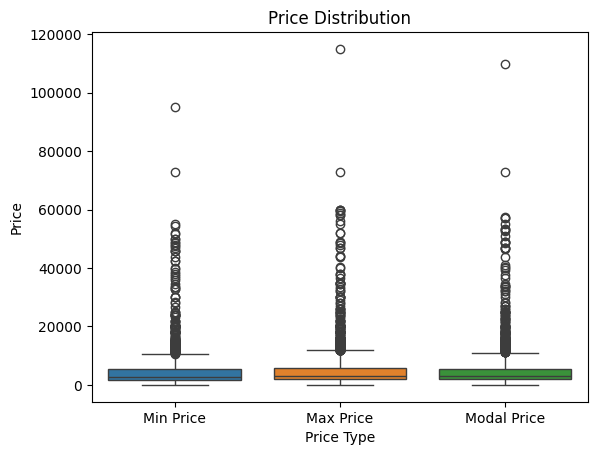

In [ ]:
comparePrice = data[['Min Price', 'Max Price', 'Modal Price']]
sns.boxplot(data=comparePrice)
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Price Distribution')
plt.show()

Let check which state have highest number of crops

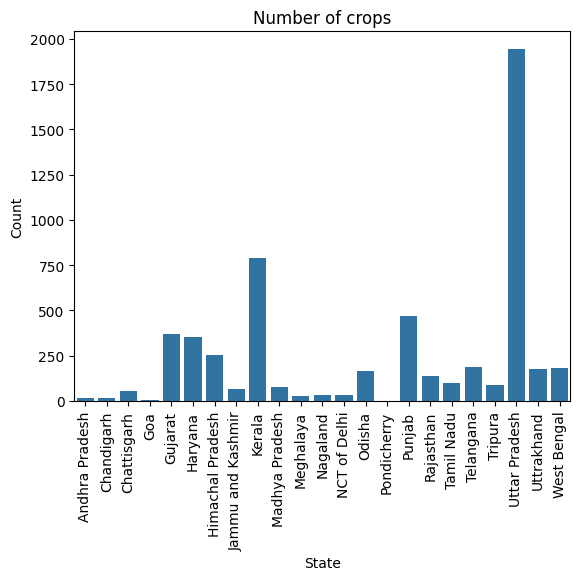

In [ ]:
sns.countplot(data=data, x='State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of crops')
plt.xticks(rotation=90)
plt.show()

Clearly seem that Uttar Pradesh has highest number of crops and second and third are Kerela and Punjab

In [ ]:
data[data['State']=='Uttar Pradesh'].Commodity.unique()

array(['Bhindi(Ladies Finger)', 'Bottle gourd', 'Brinjal', 'Cauliflower',
       'Green Chilli', 'Lemon', 'Onion', 'Potato', 'Pumpkin',
       'Sponge gourd', 'Tomato', 'Apple', 'Arhar (Tur/Red Gram)(Whole)',
       'Arhar Dal(Tur Dal)', 'Banana', 'Barley (Jau)',
       'Bengal Gram Dal (Chana Dal)', 'Bengal Gram(Gram)(Whole)',
       'Black Gram (Urd Beans)(Whole)', 'Black Gram Dal (Urd Dal)',
       'Capsicum', 'Cucumbar(Kheera)', 'Garlic', 'Gur(Jaggery)', 'Maize',
       'Mango', 'Mousambi(Sweet Lime)', 'Mustard', 'Papaya',
       'Pomegranate', 'Rice', 'Wheat', 'Bajra(Pearl Millet/Cumbu)',
       'Cabbage', 'Ghee', 'Green Gram (Moong)(Whole)',
       'Lentil (Masur)(Whole)', 'Mustard Oil', 'Paddy(Dhan)(Basmati)',
       'Raddish', 'Ridgeguard(Tori)', 'Bitter gourd', 'Spinach',
       'Banana - Green', 'Ginger(Green)', 'Jack Fruit',
       'Pointed gourd (Parval)', 'White Peas', 'Cowpea(Veg)', 'Lime',
       'Green Gram Dal (Moong Dal)', 'Colacasia', 'Masur Dal',
       'Paddy(Dhan)

Let's find Largest model prices collection of states

In [ ]:
state_num = set([x for x in data['State']])
state_num

{'Andhra Pradesh',
 'Chandigarh',
 'Chattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Kerala',
 'Madhya Pradesh',
 'Meghalaya',
 'NCT of Delhi',
 'Nagaland',
 'Odisha',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttrakhand',
 'West Bengal'}

In [ ]:
state_model_price={}
state_num = sorted(state_num)
for i in state_num:
    df = data[data['State']==i]

    state_model_price[i]= df['Modal Price'].sum()

state_model_price

{'Andhra Pradesh': 70063.0,
 'Chandigarh': 50800.0,
 'Chattisgarh': 220792.0,
 'Goa': 104500.0,
 'Gujarat': 2133679.0,
 'Haryana': 1097665.0,
 'Himachal Pradesh': 1223160.0,
 'Jammu and Kashmir': 338250.0,
 'Kerala': 4755360.0,
 'Madhya Pradesh': 209041.0,
 'Meghalaya': 238900.0,
 'NCT of Delhi': 503272.14,
 'Nagaland': 194900.0,
 'Odisha': 869670.0,
 'Pondicherry': 2224.0,
 'Punjab': 1440387.0,
 'Rajasthan': 591516.0,
 'Tamil Nadu': 469148.0,
 'Telangana': 746093.0,
 'Tripura': 676410.0,
 'Uttar Pradesh': 7228174.0,
 'Uttrakhand': 410772.0,
 'West Bengal': 973245.0}

In [ ]:
for i in state_num:
    print(i,"---->",state_model_price[i])

Andhra Pradesh ----> 70063.0
Chandigarh ----> 50800.0
Chattisgarh ----> 220792.0
Goa ----> 104500.0
Gujarat ----> 2133679.0
Haryana ----> 1097665.0
Himachal Pradesh ----> 1223160.0
Jammu and Kashmir ----> 338250.0
Kerala ----> 4755360.0
Madhya Pradesh ----> 209041.0
Meghalaya ----> 238900.0
NCT of Delhi ----> 503272.14
Nagaland ----> 194900.0
Odisha ----> 869670.0
Pondicherry ----> 2224.0
Punjab ----> 1440387.0
Rajasthan ----> 591516.0
Tamil Nadu ----> 469148.0
Telangana ----> 746093.0
Tripura ----> 676410.0
Uttar Pradesh ----> 7228174.0
Uttrakhand ----> 410772.0
West Bengal ----> 973245.0


([<matplotlib.patches.Wedge at 0x7e2292fb5e90>,
 [Text(1.0999557814955798, 0.009862999262311116, 'Andhra Pradesh'),
  Text(1.099671649221165, 0.026874967892140642, 'Chandigarh'),
  Text(1.0980735400507338, 0.06507304081145633, 'Chattisgarh'),
  Text(1.094413953233736, 0.11071629946537107, 'Goa'),
  Text(1.018542734865775, 0.4154162939174965, 'Gujarat'),
  Text(0.765747888882348, 0.7897025836808611, 'Haryana'),
  Text(0.5011007965858072, 0.9792333693563907, 'Himachal Pradesh'),
  Text(0.296753610333438, 1.059215414707542, 'Jammu and Kashmir'),
  Text(-0.40669107754873046, 1.0220579080669807, 'Kerala'),
  Text(-0.9338698872787193, 0.5812805120026235, 'Madhya Pradesh'),
  Text(-0.9656402511261271, 0.526819613724727, 'Meghalaya'),
  Text(-1.0112505928233992, 0.43286515049646085, 'NCT of Delhi'),
  Text(-1.0458418132372442, 0.340903067872135, 'Nagaland'),
  Text(-1.0824519784462352, 0.1956980182777313, 'Odisha'),
  Text(-1.0975115581844015, 0.07394849323446193, 'Pondicherry'),
  Text(-1.092

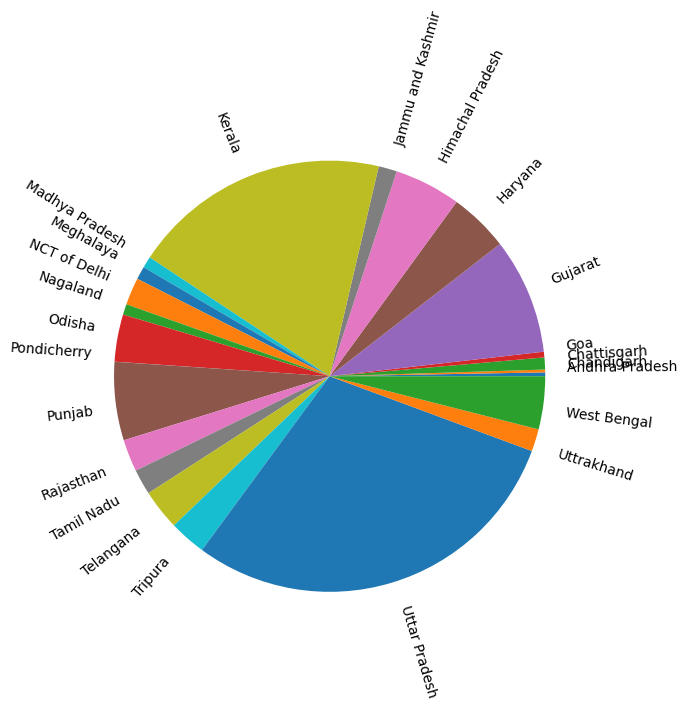

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(state_model_price.values(), labels = state_num,rotatelabels=90)

It simply indicate that Uttar Pradesh, Kerala, Gujarat has largest Model Prices

In [ ]:
top_10_highest = pd.DataFrame(data.nlargest(10, 'Modal Price'))
top_10_lowest = pd.DataFrame(data.nsmallest(10, 'Modal Price'))

In [ ]:
top_10_highest

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
1354,Kerala,Idukki,Kattappana,Cardamoms,Other,FAQ,95000.0,115000.0,110000.0
1357,Kerala,Idukki,Kattappana,Cloves,Other,FAQ,73000.0,73000.0,73000.0
403,Gujarat,Surendranagar,Halvad,Cummin Seed(Jeera),Other,FAQ,51500.0,59900.0,57500.0
284,Gujarat,Patan,Sami,Cummin Seed(Jeera),Cummin Seed(Jeera),FAQ,55000.0,60000.0,57000.0
323,Gujarat,Rajkot,Rajkot,Cummin Seed(Jeera),Cummin Seed(Jeera),FAQ,54500.0,60000.0,57000.0
2070,NCT of Delhi,Delhi,"Fish,Poultry & Egg Market, Gazipur",Fish,Hilsa,FAQ,52000.0,58000.0,55000.0
262,Gujarat,Morbi,Vankaner,Cummin Seed(Jeera),Other,FAQ,40000.0,59500.0,53500.0
304,Gujarat,Rajkot,Jasdan,Cummin Seed(Jeera),Cummin Seed(Jeera),FAQ,42500.0,59000.0,53500.0
2081,NCT of Delhi,Delhi,"Fish,Poultry & Egg Market, Gazipur",Fish,Surmai(Big),FAQ,50000.0,56000.0,53000.0
2849,Rajasthan,Jodhpur,Jodhpur (Grain)(Mandor),Cummin Seed(Jeera),Other,FAQ,47500.0,58010.0,52750.0


Text(0, 0.5, 'Max Price')

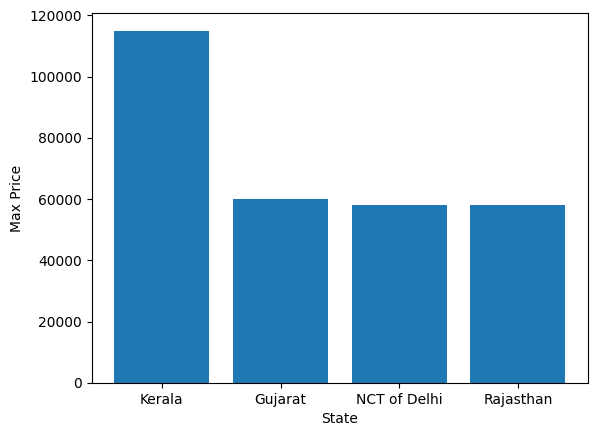

In [ ]:
plt.bar(top_10_highest["State"],top_10_highest['Max Price'])
plt.xlabel('State')
plt.ylabel('Max Price')

In [ ]:
top_10_lowest


,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
2099,NCT of Delhi,Delhi,"Flower Market,Gazipur",Tube Rose(Single),Other,FAQ,0.41,1.04,0.72
2098,NCT of Delhi,Delhi,"Flower Market,Gazipur",Tube Rose(Double),Other,FAQ,0.83,1.45,1.14
2097,NCT of Delhi,Delhi,"Flower Market,Gazipur",Rose(Local),Other,FAQ,1.66,2.50,2.08
2091,NCT of Delhi,Delhi,"Flower Market,Gazipur",Jarbara,Other,FAQ,1.00,3.00,2.20
2088,NCT of Delhi,Delhi,"Flower Market,Gazipur",Carnation,Cornation,FAQ,2.00,4.00,3.00
2089,NCT of Delhi,Delhi,"Flower Market,Gazipur",Gladiolus Cut Flower,Gladiolus Cut Flower,FAQ,3.33,5.83,5.00
2093,NCT of Delhi,Delhi,"Flower Market,Gazipur",Lotus,Other,FAQ,18.00,20.00,18.00
2087,NCT of Delhi,Delhi,"Flower Market,Gazipur",BOP,Other,FAQ,20.00,40.00,30.00
2092,NCT of Delhi,Delhi,"Flower Market,Gazipur",Lilly,Other,FAQ,25.00,35.00,30.00
2094,NCT of Delhi,Delhi,"Flower Market,Gazipur",Orchid,Other,FAQ,25.00,35.00,30.00


Text(0, 0.5, 'Minimum Price')

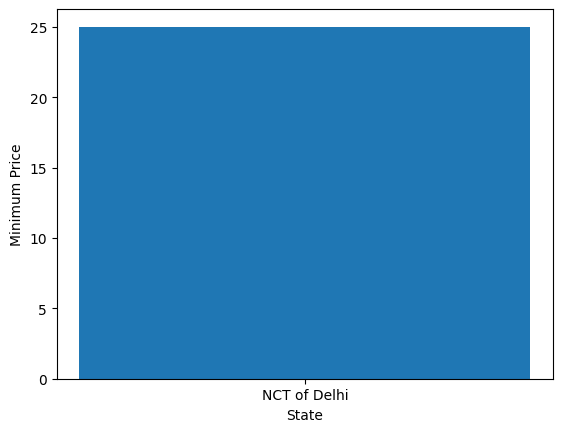

In [ ]:
plt.bar(top_10_lowest["State"],top_10_lowest['Min Price'])
plt.xlabel('State')
plt.ylabel('Minimum Price')